In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
N = 100

#set x
x = np.linspace(-6,6,num=N)
dx = x[1]-x[0]

l=.005
a=3

#calculate hamiltonian and eigenvectors
V = l*(x**2-a**2)**2
H = (-1/(2*dx**2))*(-2*np.diag(np.ones(N)) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)) + np.diag(V)
e, eigv = np.linalg.eigh(H)
eigv = eigv.T

(-1.5, 2.0)

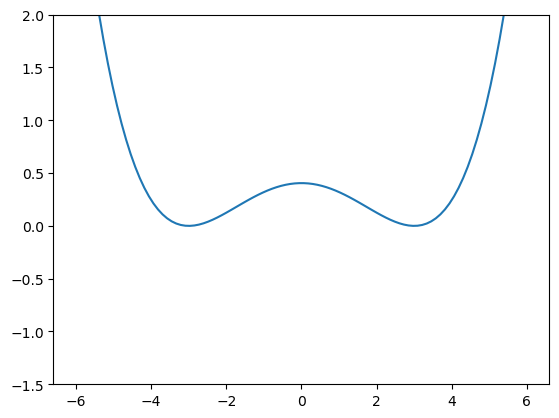

In [138]:
plt.plot(x,V)
plt.ylim(-1.5,2)

In [4]:
#trap rule
dt = .001
time = 100
steps = int(time/dt)


data = np.zeros([steps, N], dtype=np.complex128)


# set and normalize initial state
state = eigv[0]
state = state / np.sqrt(np.sum((np.square(state.real)+np.square(state.imag))*dx))
data[0] = state

#setting the perturbation
#center b, width 2c, and height d
b = -3
c = .2
d = .12

pert = d*np.exp(-1*(x-b)**2/(2*c**2))


#for i, val in enumerate(x):
#    if np.abs(val - b) > c:
#        pert[i] = 0

T = steps//5



for i, state in enumerate(data[1:]):
    if i <= T:
        strength = np.sin(np.pi*i/(2*T))
    V = l*(x**2-a**2)**2 + strength*pert
    H = (-1/(2*dx**2))*(-2*np.diag(np.ones(N)) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)) + np.diag(V)
    B = np.eye(N) - 1j*dt/2*H
    A = np.linalg.inv(np.eye(N) + 1j*dt/2*H)
    data[i+1] = A@B@data[i]

In [140]:
class State:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
        self.normalize()
        self.prob = np.square(self.real) + np.square(self.imag)

    # do something about the dx
    def normalize(self):
        norm = np.sqrt(np.sum((np.square(self.real)+np.square(self.imag))*dx))
        self.real = self.real / norm
        self.imag = self.imag / norm

    def plot(self):
        plt.figure()
        plt.ylim(-1,1)
        plt.plot(x,self.real,'r')
        plt.plot(x,self.imag,'b')
        plt.plot(x,self.prob,'g')
        plt.show()

    # do something about the path
    def save(self, path, potential):
        plt.figure()
        plt.ylim(-1.5,2)
        plt.plot(x, potential, 'k')
        plt.plot(x,self.real,'r')
        plt.plot(x,self.imag,'b')
        plt.plot(x,self.prob,'g')
        plt.savefig(f'pngstack/{path}.png')
        plt.close()

In [141]:
for i, state in enumerate(data):
    if i <= T:
        strength = np.sin(np.pi*i/(2*T))
    if i%100 == 0:
        V = l*(x**2-a**2)**2 + strength*pert
        psi = State(state.real, state.imag)
        psi.save(f'{i}', V)

In [5]:
n, m = np.linalg.eigh(H)

In [6]:
m = m.T